In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
import pathlib
data_dir="./train"
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('train')

In [3]:
potato_images_dict = {
    'healthy':list(data_dir.glob('Potato___healthy/*')),
    'early_blight':list(data_dir.glob('Potato___Early_blight/*')),
    'late_blight':list(data_dir.glob('Potato___Late_blight/*')),
}
potato_labels_dict = {
    'healthy': 0,
    'early_blight': 1,
    'late_blight': 2,
}

In [4]:
hel=len(potato_images_dict['healthy'])
ear=len(potato_images_dict['early_blight'])
lat=len(potato_images_dict['late_blight'])

print(f"number of photo of healthy  ={hel}   number of photo of early blight ={ear}   number of photo of lateblind ={lat} ")

number of photo of healthy  =663   number of photo of early blight =995   number of photo of lateblind =1000 


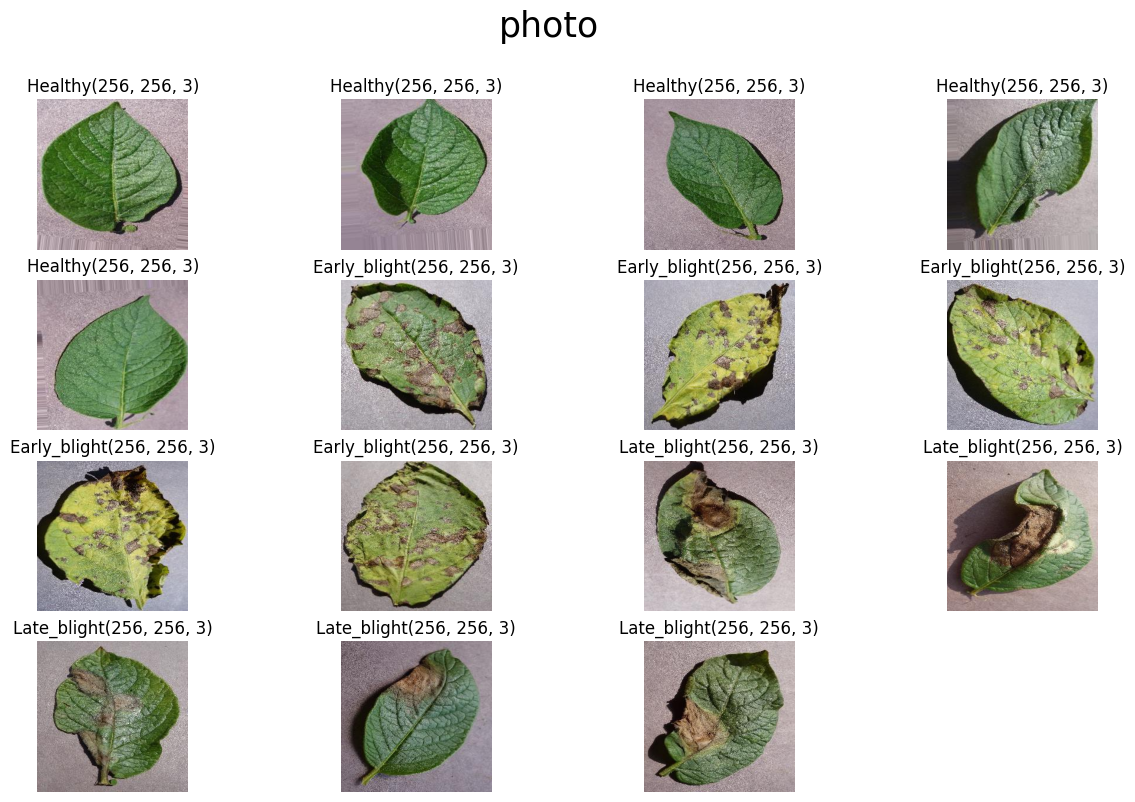

In [5]:
import random
fig=plt.figure(1,figsize=(15,9))
fig.suptitle('photo', fontsize=25)
n=0
for i in range(15):
    n+=1
    if n<=5:
        random_im=random.choice(potato_images_dict['healthy'])
        k=plt.imread(random_im)
        plt.subplot(4, 4, n)
        p=plt.imshow(k)
        l=np.shape(k)
        plt.title(f"Healthy{l}")
        plt.axis("off")
    elif n<=10:
        random_im=random.choice(potato_images_dict['early_blight'])
        k=plt.imread(random_im)
        plt.subplot(4, 4, n)
        p=plt.imshow(k)
        l=np.shape(k)
        plt.title(f"Early_blight{l}")
        plt.axis("off")
    elif n<=15:
        random_im=random.choice(potato_images_dict['late_blight'])
        k=plt.imread(random_im)
        plt.subplot(4, 4, n)
        p=plt.imshow(k)
        l=np.shape(k)
        plt.title(f"Late_blight{l}")
        plt.axis("off")

In [6]:
import cv2
from tqdm.auto import tqdm
X, y = [], []
count=0

for disease_name, images in tqdm(potato_images_dict.items()):
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(256,256))
        if resized_img.shape==(256,256,3):
            X.append(resized_img)
            y.append(potato_labels_dict[disease_name])
            count+=1

  0%|          | 0/3 [00:00<?, ?it/s]

In [7]:
print(f'Total image is: {count}')
print(f"shape of y is :{np.shape(y)}")
print(f"shape of X is :{np.shape(X)}")

Total image is: 2658
shape of y is :(2658,)
shape of X is :(2658, 256, 256, 3)


In [8]:
X[0]

array([[[147, 140, 161],
        [120, 113, 134],
        [118, 111, 132],
        ...,
        [136, 130, 149],
        [133, 127, 146],
        [129, 123, 142]],

       [[ 97,  90, 111],
        [139, 132, 153],
        [168, 161, 182],
        ...,
        [139, 133, 152],
        [137, 131, 150],
        [134, 128, 147]],

       [[132, 125, 146],
        [139, 132, 153],
        [125, 118, 139],
        ...,
        [139, 133, 152],
        [138, 132, 151],
        [136, 130, 149]],

       ...,

       [[152, 145, 160],
        [174, 167, 182],
        [163, 156, 171],
        ...,
        [155, 145, 158],
        [164, 154, 167],
        [175, 165, 178]],

       [[179, 172, 187],
        [168, 161, 176],
        [182, 175, 190],
        ...,
        [168, 158, 171],
        [154, 144, 157],
        [140, 130, 143]],

       [[189, 182, 197],
        [176, 169, 184],
        [180, 173, 188],
        ...,
        [172, 162, 175],
        [148, 138, 151],
        [122, 112, 125]]

In [9]:
x=np.array(X)
y=np.array(y)

In [10]:
x=x/255

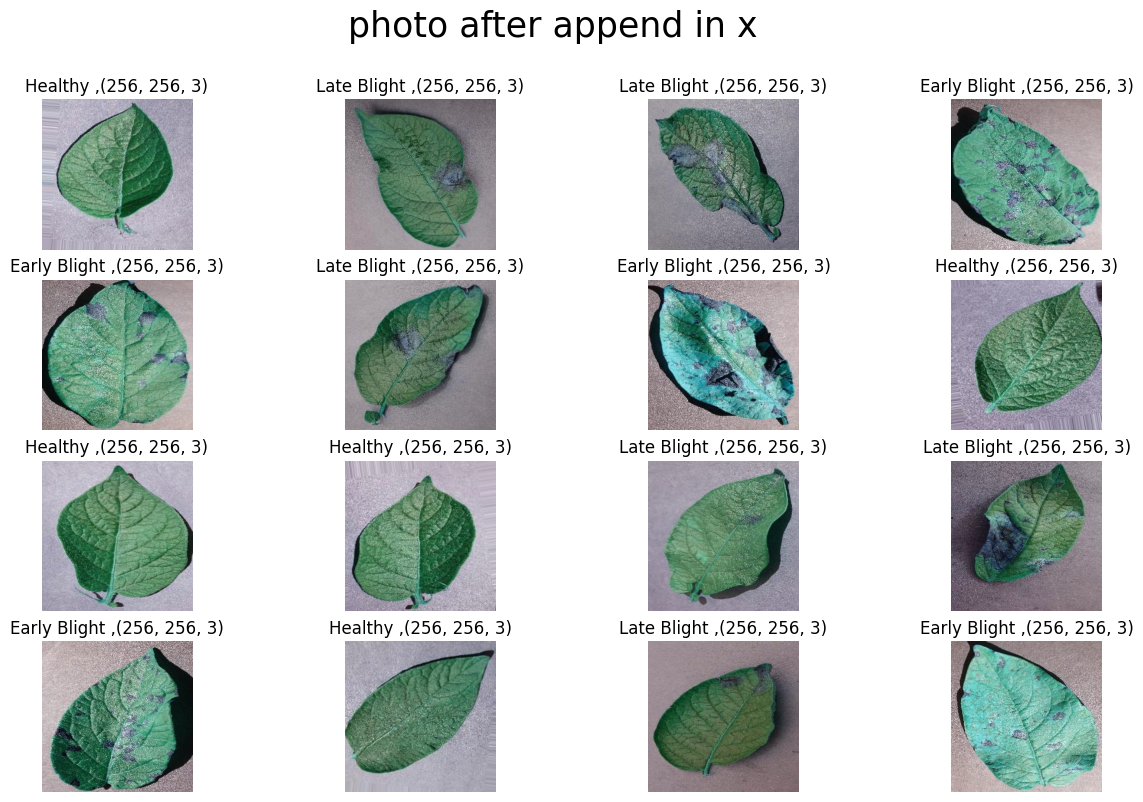

In [11]:
item={
     0:'Healthy',
     1:'Early Blight',
     2:'Late Blight',
}


plt.figure(1,figsize=(15,9))
plt.suptitle('photo after append in x',fontsize=25)
n=0
for i in range(16):
    n+=1
    a=random.randint(0,2658)
    plt.subplot(4, 4, n)
    p=plt.imshow(x[a])
    l=np.shape(x[a])
    ko=y[a]
    plt.title(f"{item[ko]} ,{l}")
    plt.axis("off")

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y,random_state=0)
x_train, x_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, shuffle=True)

In [13]:
print(f'x_train shape={np.shape(x_train)}')
print(f'y_train shape = {np.shape(y_train)}')

x_train shape=(1694, 256, 256, 3)
y_train shape = (1694,)


In [14]:
print(f'x_train shape={np.shape(x_train)}')
print(f'x_test shape={np.shape(X_test)}')
print(f'x_val shape={np.shape(x_val)}')

x_train shape=(1694, 256, 256, 3)
x_test shape=(665, 256, 256, 3)
x_val shape=(299, 256, 256, 3)


##  Building Normal Convolution Models

In [22]:
num_classes = 3

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu',input_shape=(256,256,3)),
  layers.MaxPooling2D((2,2)),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D((2,2)),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D((2,2)),
  layers.Conv2D(80, 3, padding='same', activation='relu'),
  layers.MaxPooling2D((2,2)),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(256, activation='relu'),
  layers.Dense(num_classes,activation='softmax')
])


In [23]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [25]:
history=model.fit(x_train, y_train, validation_data=(x_val,y_val), epochs=10)   

Epoch 1/10


C:\Users\shrest.jalan\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\backend.py:5585: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


53/53 [==============================] - 54s 953ms/step - loss: 0.9229 - accuracy: 0.5260 - val_loss: 0.4490 - val_accuracy: 0.8227
Epoch 2/10
53/53 [==============================] - 47s 882ms/step - loss: 0.2701 - accuracy: 0.9002 - val_loss: 0.2020 - val_accuracy: 0.9064
Epoch 3/10
53/53 [==============================] - 46s 861ms/step - loss: 0.1422 - accuracy: 0.9528 - val_loss: 0.1459 - val_accuracy: 0.9431
Epoch 4/10
53/53 [==============================] - 47s 897ms/step - loss: 0.0906 - accuracy: 0.9699 - val_loss: 0.3701 - val_accuracy: 0.9130
Epoch 5/10
53/53 [==============================] - 45s 842ms/step - loss: 0.1578 - accuracy: 0.9445 - val_loss: 0.1611 - val_accuracy: 0.9465
Epoch 6/10
53/53 [==============================] - 45s 850ms/step - loss: 0.0880 - accuracy: 0.9681 - val_loss: 0.1462 - val_accuracy: 0.9398
Epoch 7/10
53/53 [==============================] - 46s 874ms/step - loss: 0.1228 - accuracy: 0.9575 - val_loss: 0.2083 - val_accuracy: 0.9298
Epoch 8/10

In [43]:
loss_train=history.history['loss']
acc_train=history.history['accuracy']
loss_val=history.history['val_loss']
acc_val=history.history['val_accuracy']
epochs=[i for i in range(1,11)]

In [47]:
# validation loss and train loss

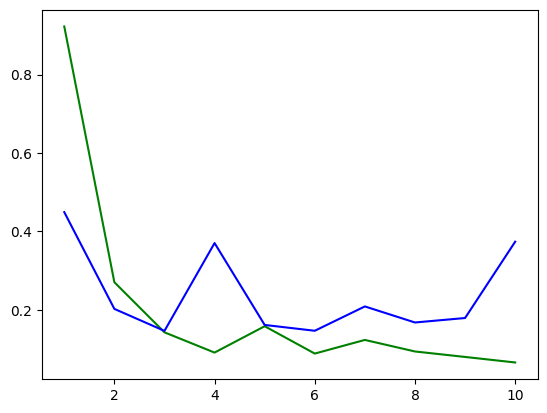

In [46]:
plt.plot(epochs, loss, 'g',label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')

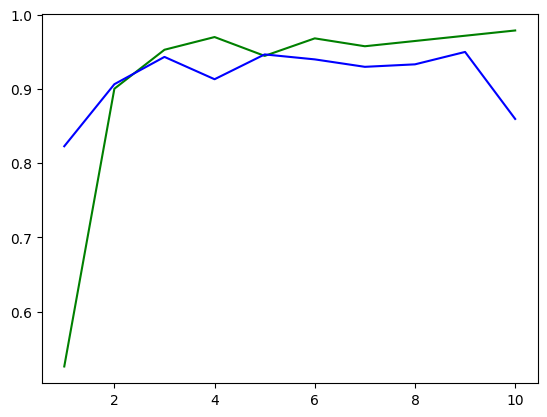

In [48]:
plt.plot(epochs, acc_train, 'g',label='Training accuracy')
plt.plot(epochs, acc_val, 'b', label='validation accuracy')

In [49]:
predictions = model.predict(X_test)
predictions

21/21 [==============================] - 3s 136ms/step


array([[1.1495016e-14, 1.0000000e+00, 1.6589087e-09],
       [1.3030281e-14, 1.0000000e+00, 2.4374927e-08],
       [2.1360481e-10, 9.9999797e-01, 2.0334205e-06],
       ...,
       [1.9287033e-06, 9.9985039e-01, 1.4765757e-04],
       [2.6044861e-06, 9.9973315e-01, 2.6422180e-04],
       [9.9960226e-01, 3.5288388e-06, 3.9416575e-04]], dtype=float32)

In [50]:
score=[np.argmax(ele) for ele in predictions]

In [51]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,score))

              precision    recall  f1-score   support

           0       0.82      0.99      0.90       162
           1       0.80      0.99      0.89       247
           2       1.00      0.63      0.78       256

    accuracy                           0.85       665
   macro avg       0.87      0.87      0.85       665
weighted avg       0.88      0.85      0.85       665



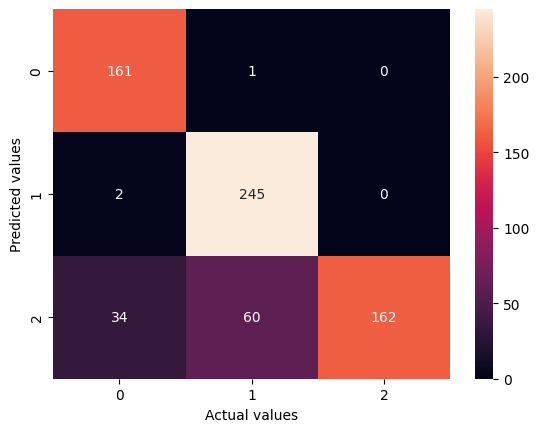

In [52]:
test_confusion_matrix = tf.math.confusion_matrix(y_test, score)
ax = sns.heatmap(test_confusion_matrix, annot = True, fmt ='g')
ax.set(xlabel = 'Actual values', ylabel = 'Predicted values')
plt.show()

In [56]:
import pickle
with open('goodpotato_model_final.pkl','wb') as f:
   pickle.dump(model,f)

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\conv2d
......vars
.........0
.........1
...layers\conv2d_1
......vars
.........0
.........1
...layers\conv2d_2
......vars
.........0
.........1
...layers\conv2d_3
......vars
.........0
.........1
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...layers\flatten
......vars
...layers\max_pooling2d
......vars
...layers\max_pooling2d_1
......vars
...layers\max_pooling2d_2
......vars
...layers\max_pooling2d_3
......vars
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........17
.........18
.........19
.........2
.........20
.........21
.........22
.........23
.........24
.........25
.........26
.........27
.........28
....

In [20]:
#import os
#model_version=max([int(i) for i in os.listdir("../models") + [0]])+1
#model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../model/1\assets


INFO:tensorflow:Assets written to: ../model/1\assets


In [35]:
#model.save("../potatoes.h5")

In [36]:
## using G_net model

##  ResNet50

In [30]:
model1 = tf.keras.applications.ResNet50(weights='imagenet',include_top=False,input_shape=(256, 256, 3))

for layer in model1.layers:
   layer.trainable=False

In [31]:
x=model1.output
x=tf.keras.layers.GlobalAveragePooling2D()(x)
x=tf.keras.layers.Dense(120,activation='relu')(x)
pred=tf.keras.layers.Dense(3,activation='softmax')(x)

model2 = keras.Model(inputs=model1.input, outputs=pred)

In [32]:
model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [33]:
model2.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_4[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 64, 64, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 64, 64, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 64, 64, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 64, 64, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 32, 32, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 32, 32, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 32, 32, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 32, 32, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 16, 16, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 16, 16, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 16, 16, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 16, 16, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 16, 16, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 16, 16, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 16, 16, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 16, 16, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 8, 8, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 8, 8, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 8, 8, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 8, 8, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

In [34]:
History=model2.fit(x_train, y_train, epochs=10)  

Epoch 1/10
53/53 [==============================] - 177s 3s/step - loss: 1.0419 - accuracy: 0.4669
Epoch 2/10
53/53 [==============================] - 170s 3s/step - loss: 0.8956 - accuracy: 0.5838
Epoch 3/10
53/53 [==============================] - 174s 3s/step - loss: 0.8484 - accuracy: 0.6169
Epoch 4/10
53/53 [==============================] - 174s 3s/step - loss: 0.8092 - accuracy: 0.6263
Epoch 5/10
53/53 [==============================] - 172s 3s/step - loss: 0.7829 - accuracy: 0.6393
Epoch 6/10
53/53 [==============================] - 173s 3s/step - loss: 0.7642 - accuracy: 0.6511
Epoch 7/10
53/53 [==============================] - 172s 3s/step - loss: 0.7083 - accuracy: 0.6771
Epoch 8/10
53/53 [==============================] - 170s 3s/step - loss: 0.6891 - accuracy: 0.6966
Epoch 9/10
53/53 [==============================] - 170s 3s/step - loss: 0.6744 - accuracy: 0.6989
Epoch 10/10
53/53 [==============================] - 170s 3s/step - loss: 0.6921 - accuracy: 0.7043


In [97]:
tf. __version__

'2.11.0'

In [3]:
#import pickle
#with open('good_model_final.pkl','rb')as f:
#    model45=pickle.load(f)

In [4]:
#classifier_json=model45.to_json()
# serialize weights to HDF5
#model45.save_weights("my_model_weights.h5")
#model45.save("model.h5")